### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data = pd.read_csv('real_estate_price_size.csv')

In [4]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [5]:
# get the descriptive analysis of the data
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [7]:
# the predicted value ( dependent variable)
y = data['price']

# the predictor value (independent variable)
x1 = data['size']

### Explore the data

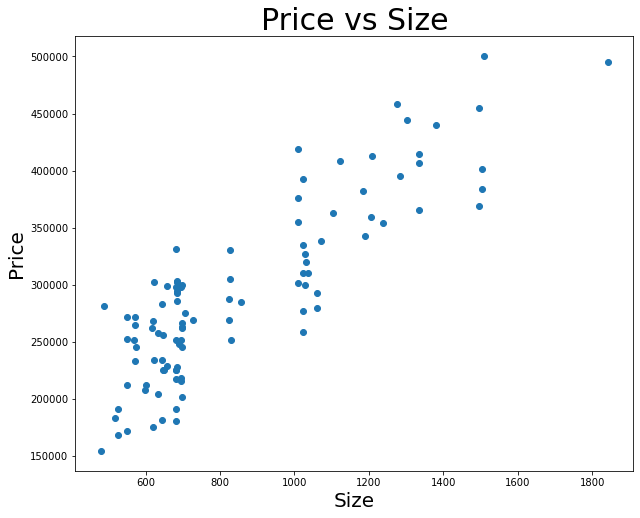

In [8]:
# plot the scatter plot to check the correlation
plt.figure(figsize=(10,8))
plt.scatter(x1,y)
plt.xlabel('Size',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.title('Price vs Size',fontsize=30)
plt.show()

### Regression itself

In [10]:
# need to create a  variable Xo generally constant 1
x = sm.add_constant(x1)

# using Ordinary Least Square method and applying regression using fit()
results = sm.OLS(y,x).fit()

# getting the summary results of regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           8.13e-31
Time:                        15:28:06   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

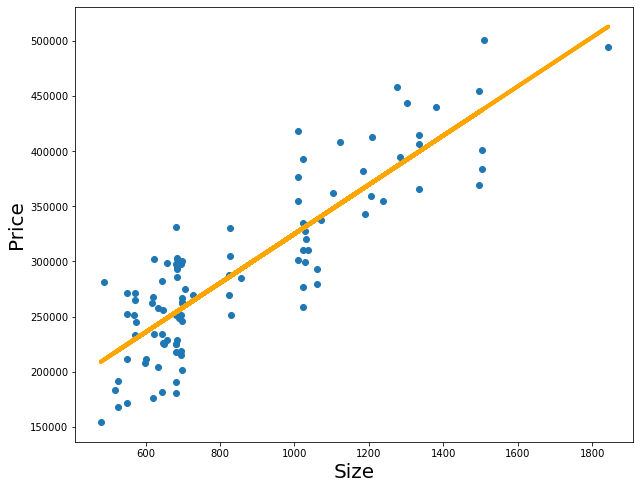

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(x1,y)
# yhat  = coeff of Size + const
yhat = 223.1787*x1 + 1.019e+05

fig = plt.plot(x1,yhat,lw = 4, c='orange', label = 'regression line')
plt.xlabel('Size',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.show()